In [1]:
from cycle import *
from hypercube import *
from complete import *
import numpy as np
from qiskit import Aer, execute, BasicAer
from qiskit.tools.visualization import plot_histogram

In [2]:
def run_qc(qc,n_times):
    """Executes a quantum circuit

    Parameters
    ----------
    qc : qiskit.circuit.quantumcircuit.QuantumCircuit
        Quantum circuit to run
    n_times : int
        Number of times to execute it

    Returns
    -------
    dict
    """
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc,backend,shots=n_times)
    return dict(job.result().get_counts(qc))

## Cycle graph

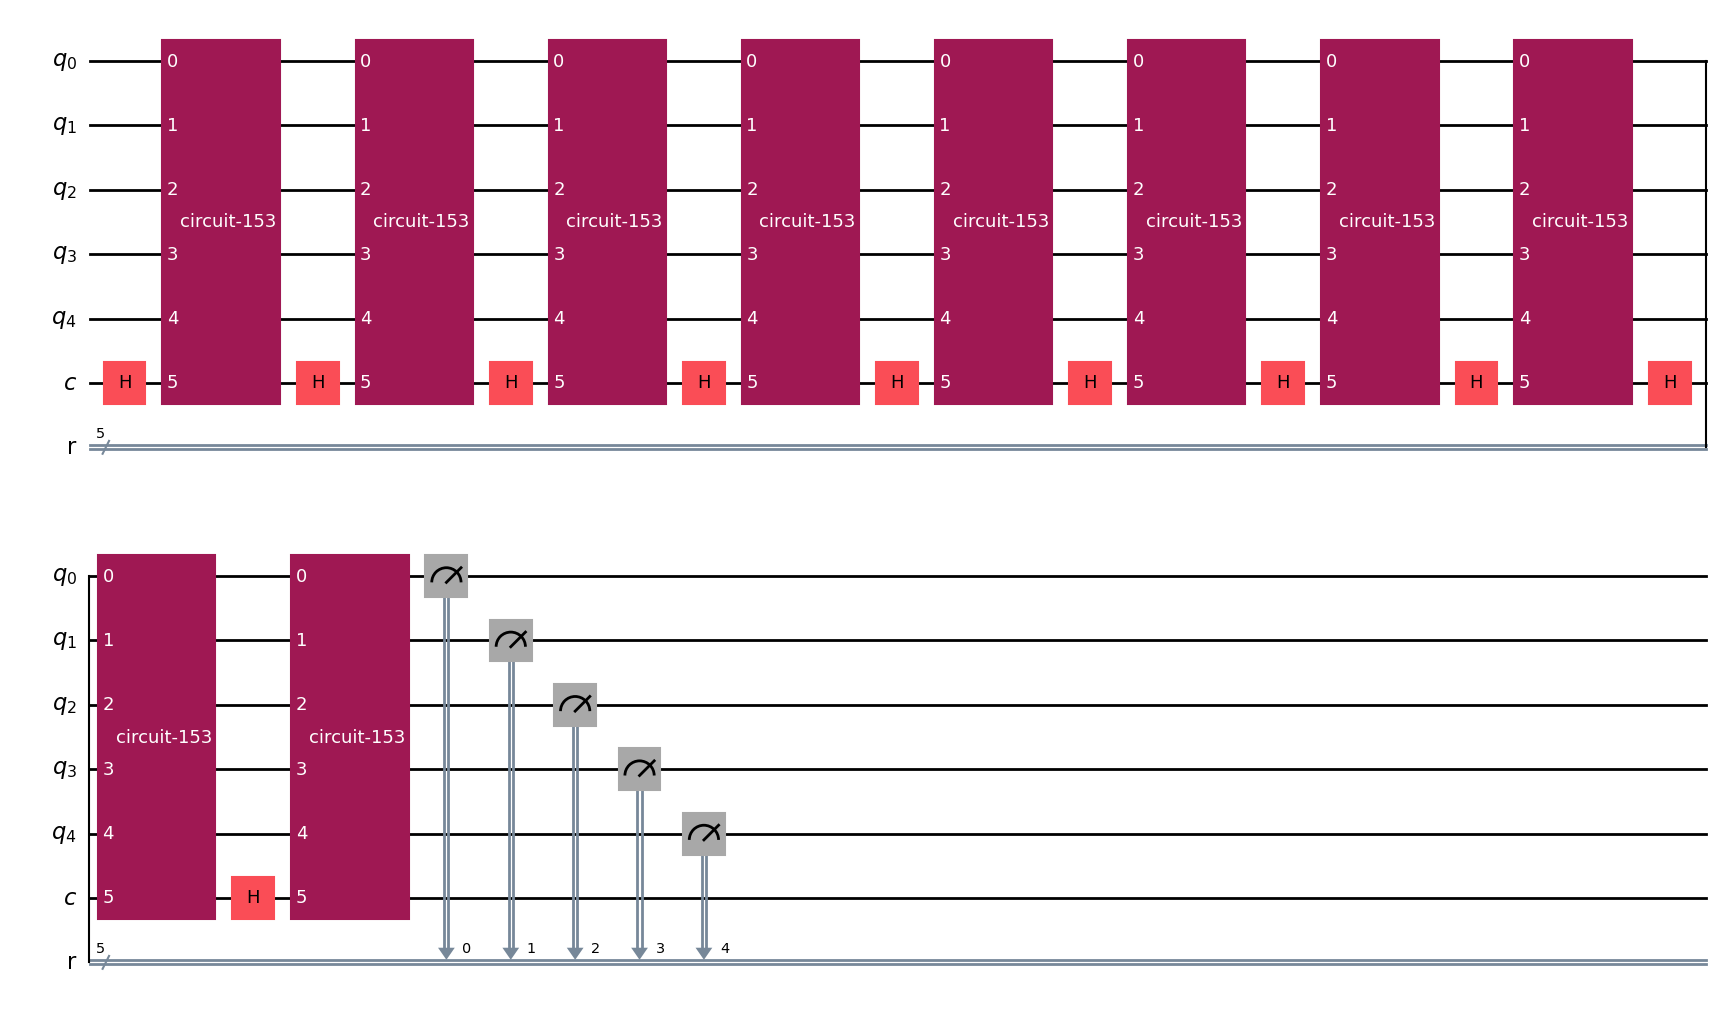

In [3]:
# Quantum walk on a 24-cycle graph of 10 steps
k = 24
n = int(np.ceil(np.log2(k)))
n_step = 10

q = QuantumRegister(n,name='q')
c = QuantumRegister(1,name='c')
r = ClassicalRegister(n,name='r')
qc = QuantumCircuit(q,c,r)

shift = shift_cycle(k)
for step in range(n_step):
    # Hadamard coin operator
    qc.h(c)
    # Shift operator
    qc.append(shift,qc.qubits)
    
qc.measure(q,r)
qc.decompose(reps=0).draw('mpl',style='iqx')

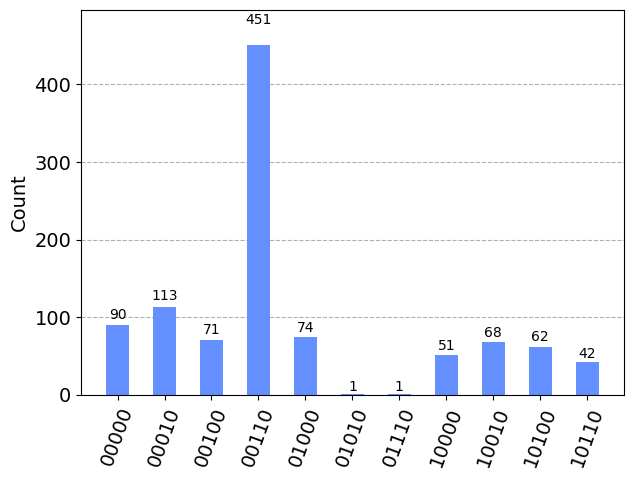

In [4]:
res = run_qc(qc,n_times=1024)
plot_histogram(res)

## Hypercube

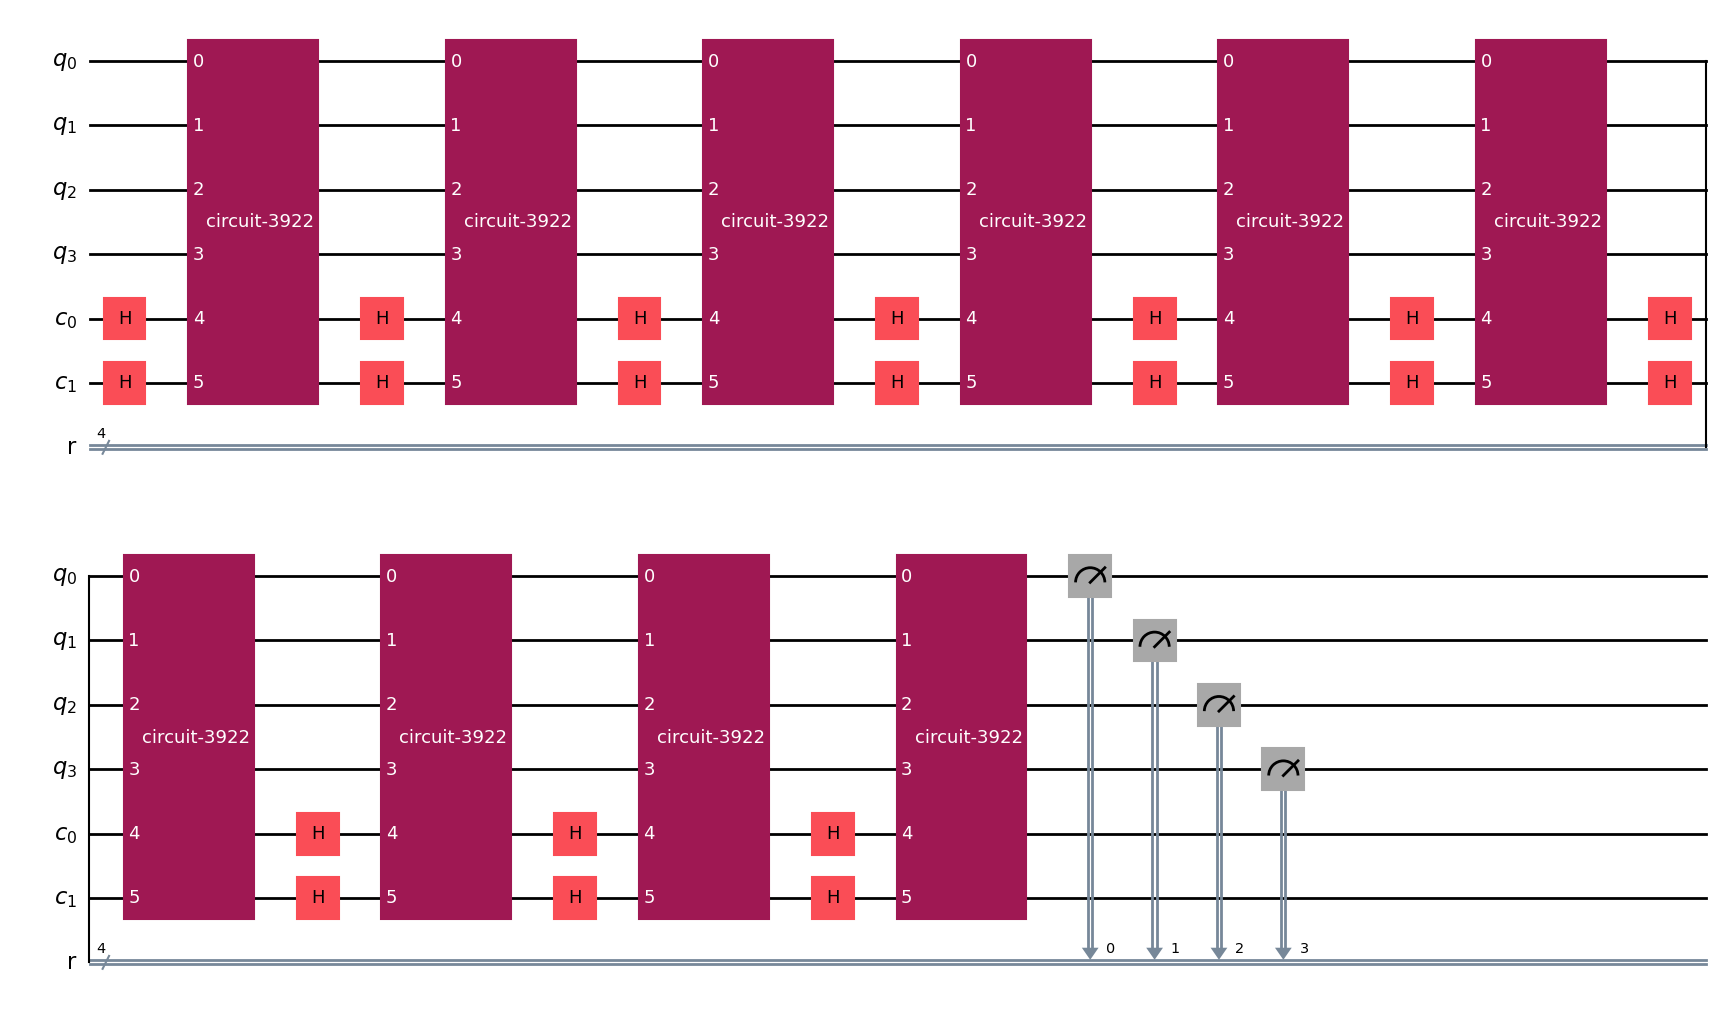

In [5]:
# Quantum walk on the 4-hypercube of 8 steps
n = 4
n_step = 10
# Dimension of the coin
coin_dim = get_coin_dim(n)

q = QuantumRegister(n,name='q')
c = QuantumRegister(coin_dim,name='c')
r = ClassicalRegister(n,name='r')
qc = QuantumCircuit(q,c,r)

shift = shift_hypercube(n,coin_dim)
for step in range(n_step):
    # Hadamard coin operator
    qc.h(c)
    # Shift operator
    qc.append(shift,qc.qubits)
    
qc.measure(q,r)
qc.decompose(reps=0).draw('mpl',style='iqx')

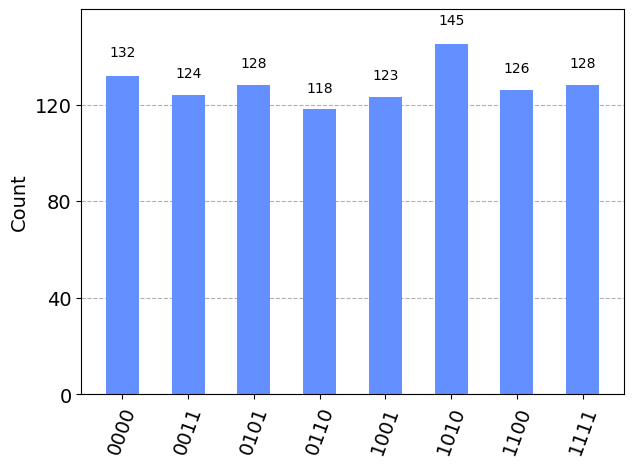

In [6]:
res = run_qc(qc,n_times=1024)
plot_histogram(res)

## Complete graph

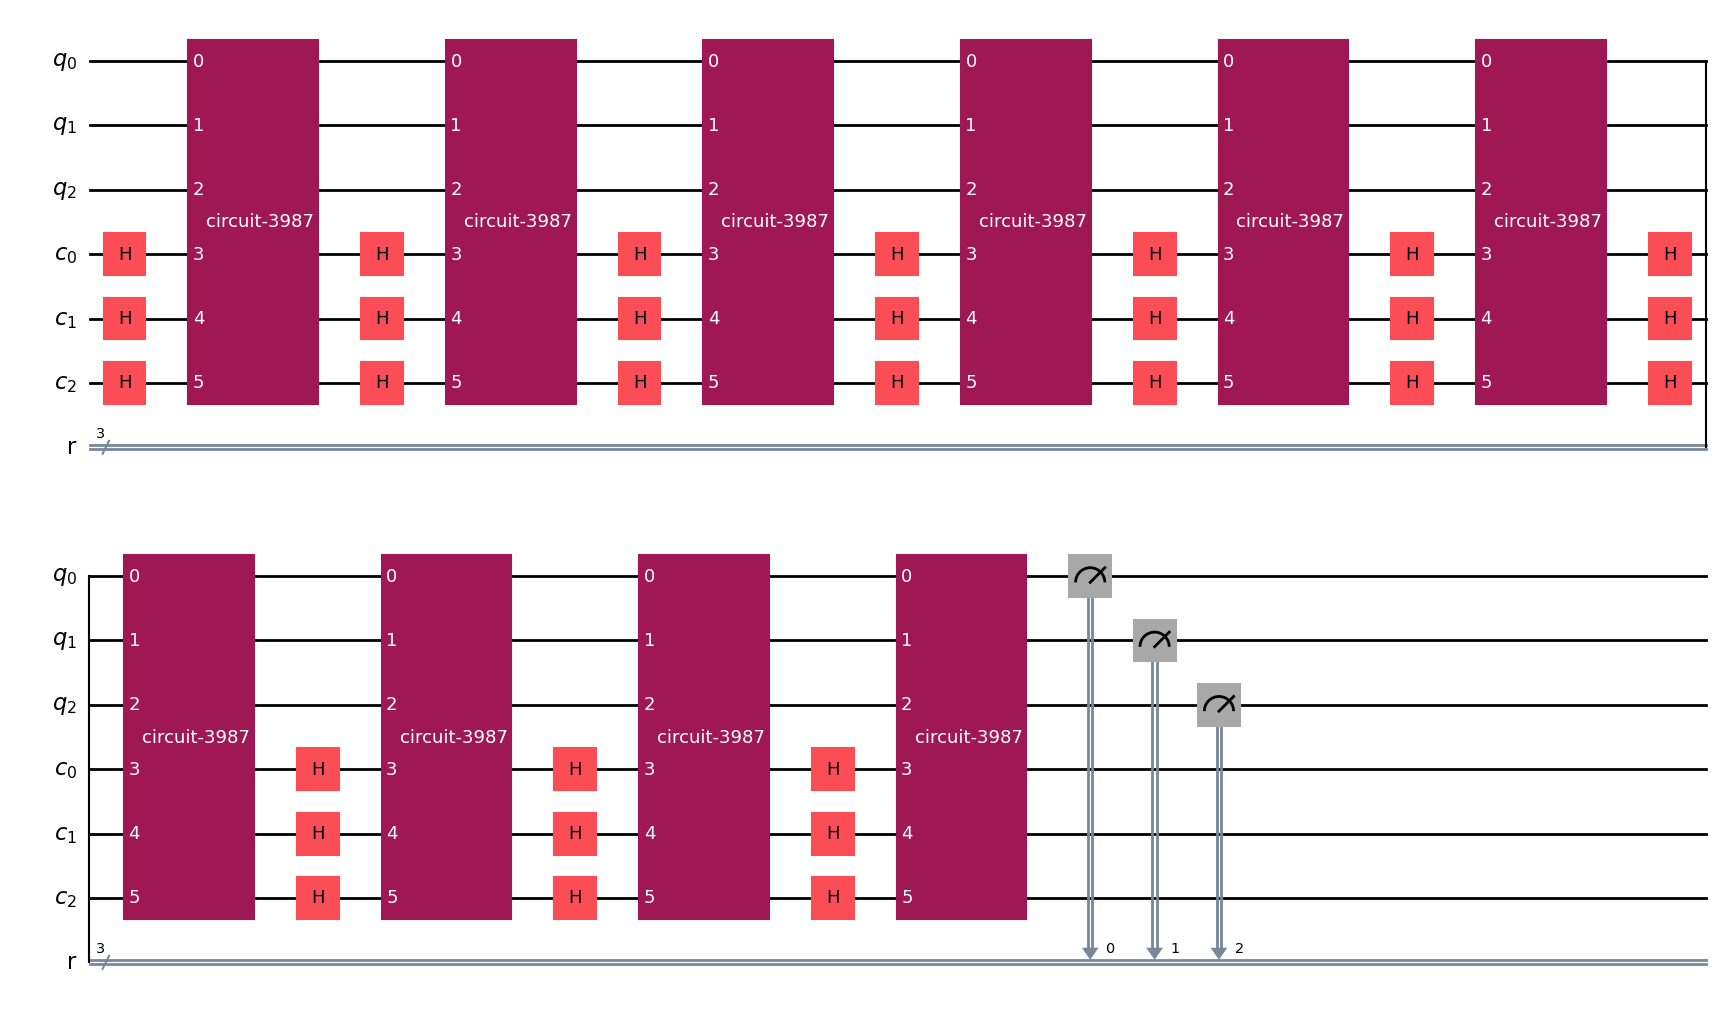

In [7]:
# Quantum walk on the complete graph K_{8} of 10 steps
n = 3
n_step = 10
q = QuantumRegister(n,name='q')
c = QuantumRegister(n,name='c')
r = ClassicalRegister(n,name='r')
qc = QuantumCircuit(q,c,r)

shift = shift_complete_graph(n)
for step in range(n_step):
    # Hadamard coin operator
    qc.h(c)
    # Shift operator
    qc.append(shift,qc.qubits)

qc.measure(q,r)
qc.decompose(reps=0).draw('mpl',style='iqx')

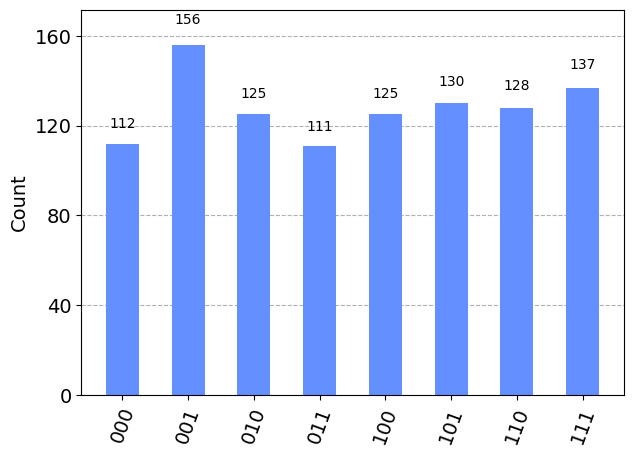

In [8]:
res = run_qc(qc,n_times=1024)
plot_histogram(res)